In [1]:
import numpy as np
import PyDSTool as dst
from PyDSTool.Toolbox import phaseplane as pp

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from IPython.display import display, Math

In [3]:
mpl.rcParams['figure.figsize'] = [6, 4]
mpl.rcParams['font.size'] = 16
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 8

In [4]:
figdir = './figures/'
plt.rc('text', usetex=True)

# Carryover of a saddle-node bifurcation
# Application: cell cycle

## 1. Original system: bifurcation diagrams

The cell cycle model is
$$
\begin{aligned}
    \frac{dY}{dt} &= k_{1} - (k_{2p} + k_{2pp}P)Y, \\
    \frac{dP}{dt} &= \frac{(k_{3p}+k_{3pp}A)(1-P)}{J_{3}+(1-P)} - k_{4}m\frac{YP}{J_{4}+P}, \\
    \frac{dA}{dt} &= k_{5p} + k_{5pp}\frac{(mY/J_{5})^{n}}{1+(mY/J_{5})^{n}} - k_{6}A,
\end{aligned}
$$
where $k_1, k_{2p}, k_{pp},k_{3p}, k_{3pp}, k_{4}, k_{5p}, k_{5pp}, k_{6}, J_{3}, J_{4}0$ are non-negative rate (add references here in markdown syntax: Segel2013, TysonNovak2011).


We can construct the bifurcation diagram using continuation and the `PyDSTool` library of python.

In [5]:
# dynamical system
Ystr = 'k1 - (k2p + k2pp*P)*Y'
Pstr = '(k3p + k3pp*A)*(1 - P)/(J3 + 1 - P) - k4*m*Y*P/(J4 + P)'
Astr = 'k5p + k5pp*(m*Y/J5)**n/(1 + (m*Y/J5)**n) - k6*A'
params = {'k1': 0.04,
          'k2p':  0.04,
          'k2pp':  1.0,
          'k3p':  1.0,
          'k3pp':  10.0,
          'k4':  35.0,
          'k5p':  0.005,
          'k5pp':  0.2,
          'k6':  0.1,
          'J3':  0.04,
          'J4':  0.04,
          'J5':  0.3,
          'm': 1.0,
          'n': 4}
ics = {'A':  0.5589948209351,
       'P':  0.9899006517009776,
       'Y':  0.03951157409159911}
DSargs = dst.args(name='CellCycle')
DSargs.pars = params
DSargs.tdata = [0, 100]
DSargs.pdomain = {'m': [0, 4.0], 
                  'k1': [0, 1.0], 
                  'k2p': [0, 10.0], 
                  'k3p': [0, 10.0], 
                  'k4': [0, 200.0], 
                  'k5p': [0, 1.0], 
                  'k5pp': [0, 10.0],
                  'k6': [0, 10.0]}
DSargs.xdomain = {'Y': [0, 5.0], 'P': [0, 10.0], 'A': [0, 10.0]}
DSargs.varspecs = {'Y': Ystr, 'P': Pstr, 'A': Astr}
DSargs.ics = ics
DS = dst.Generator.Vode_ODEsystem(DSargs)

In [6]:
PC = dst.ContClass(DS)
traj = DS.compute('cycle')
cycle = traj.sample(dt=0.0001, tlo=0, thi=56.45, precise=True)
cycle.indepvararray = cycle.indepvararray.flatten()
name3 = 'LC2'
PCargs = dst.args(name=name3)
PCargs.type = 'LC-C'
PCargs.initcycle = cycle
PCargs.freepars = ['m']
PCargs.StepSize = 1e-2
PCargs.MaxNumPoints = 5000
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 200
PCargs.SolutionMeasures = 'avg'
PCargs.NumSPOut = 10
PCargs.SaveEigen = True
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name3].backward()
PC.curves[name3].forward()

running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "_auto_CellCycle_vf" sources
swig: /home/shigoto/Documents/Work/Projects/2020-05 Saddle-node Bifurcation Carryover/codes/notebooks/auto_temp/auto_CellCycle_vf.i
swig -python -I/home/shigoto/.local/lib/python3.8/site-packages/numpy/core/include -I/home/shigoto/Documents/Work/Projects/2020-05 Saddle-node Bifurcation Carryover/codes/notebooks -I/home/shigoto/.local/lib/python3.8/site-packages/PyDSTool/PyCont/auto/module/include -I/home/shigoto/Documents/Work/Projects/2020-05 Saddle-node Bifurcation Carryover/codes/notebooks/auto_temp -I/home/shigoto/.local/lib/python3.8/site-packages/PyDSTool/PyCont/auto/src/include -o auto_temp/src.linux-x86_64-3.8/auto_temp/auto_CellCycle_vf_wrap.c -outdir auto_temp/src.linux-x86_64-3.8/auto_

In [7]:
fps = pp.find_fixedpoints(DS, n=4, eps=1e-8)
fps

({'A': 0.5420835741849908, 'P': 0.1364100558653051, 'Y': 0.22674444381187284},)

In [8]:
name1 = 'EQ1'
PCargs = dst.args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = fps[0]
PCargs.freepars = ['m']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 5000
PCargs.MaxStepSize = 5e-3
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

Checking...
  |q| = 1.000000
  |<p,q> - 1| =  2.259867778351052e-16
  |Aq - iwq| = 0.000000
  |A*p + iwp| = 0.000000

H Point found 
0 : 
A  =  0.37364259068879113
P  =  0.07504313758747116
Y  =  0.3476956630254165
m  =  0.5719350915004267

Eigenvalues = 

     (-21.454000,0.000000)
     (-0.000000,0.196742)
     (-0.000000,-0.196742)


w = 0.19674244206071623
l1 = -19.039875855476623


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
A  =  0.05877906321344884
P  =  0.05155301918669395
Y  =  0.4369053074965493
m  =  0.1769359636582977

Eigenvalues = 

     (-13.094156,0.000000)
     (-0.074183,0.000000)
     (0.000000,0.000000)


a = 0.38496960523059043

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

Neutral saddle found!

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose

Indeed there is a bifurcation point (`LP1`) at which a critical transition drives gen activation.

In [9]:
name2 = 'LC1'
PCargs = dst.args(name=name2)
PCargs.type = 'LC-C'
PCargs.initpoint = 'EQ1:H1'
PCargs.freepars = ['m']
PCargs.StepSize = 1e-1
PCargs.NumSPOut = 30
PCargs.MaxNumPoints = 5000
PCargs.MaxStepSize = 5e-1
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 200
PCargs.SolutionMeasures = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()

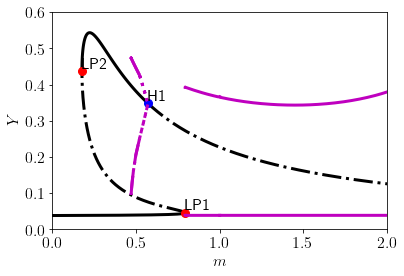

In [10]:
PC[name1].display(('m', 'Y'), stability=True, linewidth=3)
PC[name2].display(('m', 'Y_min'), stability=True, linewidth=3)
PC[name2].display(('m', 'Y_max'), stability=True, linewidth=3)
PC[name3].display(('m', 'Y_min'), stability=True, linewidth=3)
PC[name3].display(('m', 'Y_max'), stability=True, linewidth=3)
PC.plot.fig1.toggleAll('off', bytype=['P','B','MX','RG'])
PC.plot.fig1.axes1.axes.set_xlabel('$m$', fontsize=16)
PC.plot.fig1.axes1.axes.set_xlim((0.0, 2.0))
PC.plot.fig1.axes1.axes.set_ylabel('$Y$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((0.0, 0.6))
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(figdir + 'ApplicationCellCycleOriginalBifurcation.pdf', bbox_inches='tight')
plt.show()

In [11]:
# Two-parameter bifurcation
namefold = 'FO1'
PCargs = dst.args(name=namefold)
PCargs.type = 'LP-C'
PCargs.initpoint = 'EQ1:LP1'
PCargs.freepars = ['m', 'k5p']
PCargs.StepSize = 1e-2
PCargs.MaxNumPoints = 2000
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-4
PCargs.SaveEigen = True
PCargs.SaveJacobian = True
PCargs.LocBifPoints = 'all'
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2
PC.newCurve(PCargs)
PC.curves[namefold].forward()
PC.curves[namefold].backward()


Checking...
  <b,c> = 0.000000


BT Point found 
0 : 
A  =  0.23255380650584964
P  =  0.8146179273502168
Y  =  0.04680454121062249
m  =  1.7517506478572544
k5p  =  0.022145771830141072

Eigenvalues = 

     (-3.730463,0.000000)
     (-0.000002,0.000000)
     (0.000002,0.000000)



Checking...
  |a| = 4.912761


CP Point found 
0 : 
A  =  0.41819840751195003
P  =  0.7148374995375592
Y  =  0.052991537946253935
m  =  2.5873763586159364
k5p  =  0.0334587453412552

Eigenvalues = 

     (-3.809747,0.000000)
     (0.000000,0.000000)
     (0.657573,0.000000)


Test function going crazy:  <PyDSTool.PyCont.TestFunc.CP_Fold object at 0x7f655957c040> 


Checking...
  |a| = 2.474909


CP Point found 
0 : 
A  =  0.4324814344524638
P  =  0.6506179004310143
Y  =  0.057919147440337146
m  =  2.5017894465363004
k5p  =  0.032924796450116055

Eigenvalues = 

     (-3.541714,0.000000)
     (-0.000000,0.000000)
     (0.920973,0.000000)




/home/shigoto/.local/lib/python3.8/site-packages/PyDSTool/PyCont/Continuation.py:854: LinAlgWarning: Ill-conditioned matrix (rcond=3.87694e-17): result may not be accurate.
  WX = linalg.solve(B,mat([R,Q]).T)



Checking...
  <b,c> = 0.000012


BT Point found 
0 : 
A  =  0.1511358361470541
P  =  0.07567556047999872
Y  =  0.34579473688321866
m  =  0.30402513849477725
k5p  =  0.012142219816508683

Eigenvalues = 

     (-11.323194,0.000000)
     (-0.000001,0.000000)
     (0.000001,0.000000)


Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

ZH Point found 
0 : 
A  =  0.10782670395492537
P  =  0.06246711126000924
Y  =  0.3903691585341994
m  =  0.2393018250536415
k5p  =  0.008919866951011364

Eigenvalues = 

     (-12.701700,0.000000)
     (-0.043819,0.000000)
     (0.000000,0.000000)


B Point found 
0 : 
A  =  -1.5353847361020034e-08
P  =  0.043448908276091436
Y  =  0.47933521032605547
m  =  0.10988614814829359
k5p  =  -0.00018987383372145384

Test function going crazy:  <PyDSTool.PyCont.TestFunc.CP_Fold object at 0x7f6540913c10> 


Checking...
  |a| = 10.133876


CP Point found 
0 : 
A  =  0.041624822500144786
P  =  0.827061728823008
Y  =  0.0461328169267694
m  =  0.74681

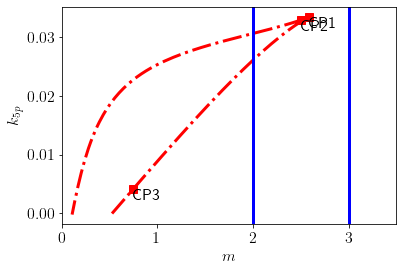

In [12]:
PC[namefold].display(('m', 'k5p'), stability=True, linewidth=3)
PC.plot.fig1.toggleAll('off', bytype=['B', 'P', 'BT', 'ZH'])
PC.plot.fig1.axes1.axes.set_xlim((0.0, 3.5))
PC.plot.fig1.axes1.axes.set_xlabel('$m$', fontsize=16)
# PC.plot.fig1.axes1.axes.set_ylim((0.0, 0.15))
PC.plot.fig1.axes1.axes.set_ylabel('$k_{5p}$', fontsize=16)
plt.axvline(x=2.0, lw=3, color='b')
plt.axvline(x=3.0, lw=3, color='b')
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(figdir + 'ApplicationCellCycleTwoParBifurcation.pdf', bbox_inches='tight')
plt.show()

## 2. Extended system: bifurcation diagram

The cell cycle model is
$$
\begin{aligned}
    \frac{dY}{dt} &= k_{1} - (k_{2p} + k_{2pp}P)Y, \\
    \frac{dP}{dt} &= \frac{(k_{3p}+k_{3pp}A)(1-P)}{J_{3}+(1-P)} - k_{4}m\frac{YP}{J_{4}+P}, \\
    \frac{dA}{dt} &= k_{5p} + k_{5pp}\frac{(mY/J_{5})^{n}}{1+(mY/J_{5})^{n}} - k_{6}A, \\
    \frac{dm}{dt} &= \mu m \left( 1 - \frac{m}{K}\right),
\end{aligned}
$$
where $k_1, k_{2p}, k_{pp},k_{3p}, k_{3pp}, k_{4}, k_{5p}, k_{5pp}, k_{6}, J_{3}, J_{4}0$ are non-negative rate.


We can construct the bifurcation diagram using continuation and the `PyDSTool` library of python.

In [232]:
# dynamical system
Ystr = 'k1 - (k2p + k2pp*P)*Y'
Pstr = '(k3p + k3pp*A)*(1 - P)/(J3 + 1 - P) - k4*m*Y*P/(J4 + P)'
Astr = 'k5p + k5pp*(m*Y/J5)**n/(1 + (m*Y/J5)**n) - k6*A'
mstr = 'mu*m*(1 - m/K)'
params = {'k1': 0.04,
          'k2p':  0.04,
          'k2pp':  1.0,
          'k3p':  1.0,
          'k3pp':  10.0,
          'k4':  35.0,
          'k5p':  0.005,
          'k5pp':  0.2,
          'k6':  0.1,
          'J3':  0.04,
          'J4':  0.04,
          'J5':  0.3,
          'mu': 0.1,
          'K': 2.0,
          'n': 4}
ics = {'A':  0.8850704900359198,
'P':  0.9854966451671725,
'Y':  0.03899139282479138,
'm':  2.0}
DSargs = dst.args(name='CellCycle')
DSargs.pars = params
DSargs.tdata = [0, 100]
DSargs.pdomain = {'mu': [0, 1.0],
                  'K': [1.0, 5.0],
                  'k1': [0, 1.0], 
                  'k2p': [0, 10.0], 
                  'k3p': [0, 10.0], 
                  'k4': [0, 200.0], 
                  'k5p': [0, 0.04], 
                  'k5pp': [0, 10.0],
                  'k6': [0, 10.0]}
DSargs.xdomain = {'Y': [0, 5.0], 'P': [0, 10.0], 'A': [0, 10.0], 'm': [0, 2.0]}
DSargs.varspecs = {'Y': Ystr, 'P': Pstr, 'A': Astr, 'm': mstr}
DSargs.ics = ics
DS = dst.Generator.Vode_ODEsystem(DSargs)

In [233]:
traj = DS.compute('cycle')
cycle = traj.sample(dt=0.0001, tlo=0, thi=53.32, precise=True)
cycle.indepvararray = cycle.indepvararray.flatten()

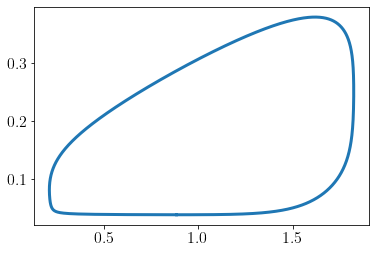

In [234]:
plt.plot(cycle['A'], cycle['Y'])

In [235]:
print(cycle[0])
print(cycle[-1])

A:  0.8850704900359198
P:  0.9854966451671725
Y:  0.03899139282479138
m:  2.0
A:  0.8857433457285256
P:  0.9855101608441343
Y:  0.03899127736033741
m:  2.0


In [236]:
PC = dst.ContClass(DS)
name3 = 'LC2'
PCargs = dst.args(name=name3)
PCargs.type = 'LC-C'
PCargs.initcycle = cycle
PCargs.freepars = ['k5p']
# PCargs.StepSize = 2e-8
# PCargs.MaxNumPoints = 50000
# PCargs.MaxStepSize = 5e-8
# PCargs.MinStepSize = 1e-8
# PCargs.MaxTestIters = 1000
# PCargs.SolutionMeasures = 'min'
# PCargs.NumSPOut = 40
# PCargs.SaveEigen = True
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name3].backward()
# PC.curves[name3].forward()

running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "_auto_CellCycle_vf" sources
swig: /home/shigoto/Documents/Work/Projects/2020-05 Saddle-node Bifurcation Carryover/codes/notebooks/auto_temp/auto_CellCycle_vf.i
swig -python -I/home/shigoto/.local/lib/python3.8/site-packages/numpy/core/include -I/home/shigoto/Documents/Work/Projects/2020-05 Saddle-node Bifurcation Carryover/codes/notebooks -I/home/shigoto/.local/lib/python3.8/site-packages/PyDSTool/PyCont/auto/module/include -I/home/shigoto/Documents/Work/Projects/2020-05 Saddle-node Bifurcation Carryover/codes/notebooks/auto_temp -I/home/shigoto/.local/lib/python3.8/site-packages/PyDSTool/PyCont/auto/src/include -o auto_temp/src.linux-x86_64-3.8/auto_temp/auto_CellCycle_vf_wrap.c -outdir auto_temp/src.linux-x86_64-3.8/auto_

In [237]:
fps = pp.find_fixedpoints(DS, n=4, eps=1e-8)
fps

({'A': 0.051215411878439525,
  'P': 1.6581629493592063,
  'Y': 0.02355486557700103,
  'm': 2.0},
 {'A': 0.05000000000000002,
  'P': 0.9999999999999956,
  'Y': 0.03846153846154625,
  'm': -1.583327336586685e-19},
 {'A': 0.7127848739479983,
  'P': 0.277816108256646,
  'Y': 0.12585894471937878,
  'm': 2.0},
 {'A': 0.055562950271203844,
  'P': 1.120372749494177,
  'Y': 0.034471681636286694,
  'm': 2.0})

In [238]:
name1 = 'EQ1'
PCargs = dst.args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = fps[2]
PCargs.freepars = ['k5p']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 5000
PCargs.MaxStepSize = 5e-3
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

Neutral saddle found!

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
A  =  0.42325685315315825
P  =  0.49418945769437567
Y  =  0.07487980046001787
m  =  2.0
k5p  =  0.030631818510688053

Eigenvalues = 

     (-3.262166,0.000000)
     (-0.000000,0.000000)
     (1.190667,0.000000)
     (-0.100000,0.000000)


a = 0.1897815445176204


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000001

LP Point found 
0 : 
A  =  0.2803176459936144
P  =  0.8061908131345967
Y  =  0.04727066210022481
m  =  2.0
k5p  =  0.02607846297252048

Eigenvalues = 

     (-3.979172,0.000000)
     (0.000000,0.000000)
     (0.065326,0.000000)
     (-0.100000,0.000000)


a = 4.20609782177662

B Point found 
0 : 
A  =  0.41026470315076313
P  =  0.9550179096429889
Y  =  0.04020028143448387
m  =  2.0
k5p  =  0.03999999941772164

B Point found

In [239]:
name2 = 'EQ2'
PCargs = dst.args(name=name2)
PCargs.type = 'EP-C'
PCargs.initpoint = fps[0]
PCargs.freepars = ['k5p']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 5000
PCargs.MaxStepSize = 5e-3
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()

B Point found 
0 : 
A  =  0.00019426821331178064
P  =  2.6460568996415366
Y  =  0.014891717299562098
m  =  2.0
k5p  =  -7.1106153670900636e-12

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000004

LP Point found 
0 : 
A  =  0.07661331695998193
P  =  1.2629326875349751
Y  =  0.030699974283150574
m  =  2.0
k5p  =  0.0073110191871714044

Eigenvalues = 

     (-2.835345,0.000000)
     (-0.039687,0.000000)
     (-0.000000,0.000000)
     (-0.100000,0.000000)


a = 6.43066659482632

B Point found 
0 : 
A  =  0.006609306830907341
P  =  1.0712910661422828
Y  =  0.03599417040114912
m  =  2.0
k5p  =  -2.265097847256428e-10



Indeed there is a bifurcation point (`LP1`) at which a critical transition drives gen activation.

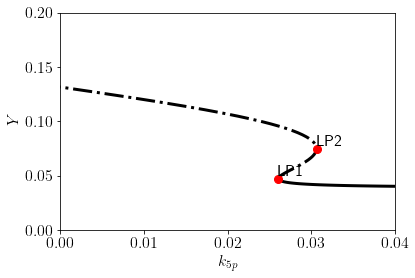

In [242]:
PC[name1].display(('k5p', 'Y'), stability=True, linewidth=3)
# PC[name2].display(('k5p', 'Y'), stability=True, linewidth=3)
# PC[name3].display(('k5p', 'Y_max'), stability=True, linewidth=3)
PC.plot.fig1.toggleAll('off', bytype=['P', 'B', 'H'])
PC.plot.fig1.axes1.axes.set_xlabel('$k_{5p}$', fontsize=16)
PC.plot.fig1.axes1.axes.set_xlim((0.0, 0.04))
PC.plot.fig1.axes1.axes.set_ylabel('$Y$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((0.0, 0.2))
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(figdir + 'ApplicationCellCycleExtendedlBifurcation.pdf', bbox_inches='tight')
plt.show()

## Carryover when $g$ depends on the other variables

Use the first step as an example:
$$
\begin{aligned}
    \frac{dY}{dt} &= k_{1} - (k_{2p} + k_{2pp}P)Y, \\
    \frac{dP}{dt} &= \frac{(k_{3p}+k_{3pp}A)(1-P)}{J_{3}+(1-P)} - k_{4}m\frac{YP}{J_{4}+P},
\end{aligned}
$$
where $A=0$ is constant, then transform
$$
    \frac{dA}{dt} = k_{5p} + k_{5pp}\frac{(mY/J_{5})^{n}}{1+(mY/J_{5})^{n}} - k_{6}A.
$$
Does this guarantee the existance of the SN bifurcation?

In [11]:
# dynamical system
Ystr = 'k1 - (k2p + k2pp*P)*Y'
Pstr = '(k3p + k3pp*A)*(1 - P)/(J3 + 1 - P) - k4*m*Y*P/(J4 + P)'
params = {'A': 0.0,
          'k1': 0.04,
          'k2p':  0.04,
          'k2pp':  1.0,
          'k3p':  1.0,
          'k3pp':  10.0,
          'k4':  35.0,
          'J3':  0.04,
          'J4':  0.04,
          'm': 1.0}
ics = {'Y': 1.0, 'P': 0.5}
DSargs = dst.args(name='CellCycle')
DSargs.pars = params
DSargs.tdata = [0, 2]
DSargs.pdomain = {'m': [0, 10.0], 'A': [0, 1.1],}
DSargs.xdomain = {'Y': [0, 5.0], 'P': [0, 10.0]}
DSargs.varspecs = {'Y': Ystr, 'P': Pstr}
DSargs.ics = ics
DS = dst.Generator.Vode_ODEsystem(DSargs)

In [12]:
fps = pp.find_fixedpoints(DS, n=4, eps=1e-8)
fps

({'P': 0.0011637197075304387, 'Y': 0.971729481305414},)

In [13]:
# bifurcation diagram for s
# first branch
PC = dst.ContClass(DS)
name1 = 'EQ1'
PCargs = dst.args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = fps[0]
PCargs.freepars = ['m']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 5000
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

B Point found 
0 : 
P  =  0.00011049760840167589
Y  =  0.997245169843554
m  =  10.000000011595674


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
P  =  0.040134021344593686
Y  =  0.49916376750882524
m  =  0.10971397984842488

Eigenvalues = 

     (-12.060003,0.000000)
     (-0.000000,0.000000)


a = 0.15638418577543914


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000002

LP Point found 
0 : 
P  =  0.827956452753923
Y  =  0.04608526138965237
m  =  0.5273193026839457

Eigenvalues = 

     (-1.802749,0.000000)
     (0.000000,0.000000)


a = 2.484916156044039

B Point found 
0 : 
P  =  1.000000000285675
Y  =  0.038461538450973554
m  =  -5.517609444459165e-09



Indeed there is a bifurcation point (`LP1`) at which a critical transition drives gen activation.

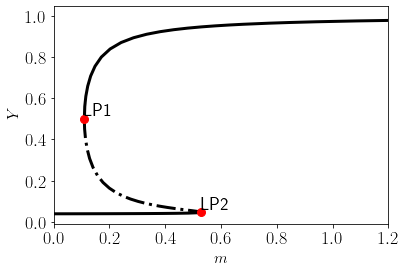

In [36]:
PC[name1].display(('m', 'Y'), stability=True, linewidth=3)
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlabel('$m$', fontsize=16)
PC.plot.fig1.axes1.axes.set_xlim((0.0, 1.2))
PC.plot.fig1.axes1.axes.set_ylabel('$Y$', fontsize=16)
# PC.plot.fig1.axes1.axes.set_ylim((0.0, 2.6))
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(figdir + 'ApplicationCellCycleExtendedBifurcation.pdf', bbox_inches='tight')
plt.show()

In [37]:
# Two-parameter bifurcation
namefold1 = 'F01'
PCargs = dst.args(name=namefold1)
PCargs.type = 'LP-C'
PCargs.initpoint = 'EQ1:LP1'
PCargs.freepars = ['m', 'A']
PCargs.StepSize = 1e-2
PCargs.MaxNumPoints = 2000
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-4
PCargs.SaveEigen = True
PCargs.SaveJacobian = True
PCargs.LocBifPoints = 'all'
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2
PC.newCurve(PCargs)
PC.curves[namefold1].forward()
# PC.curves[namefold1].backward()

B Point found 
0 : 
P  =  0.040134040974082665
Y  =  0.49916364523457635
m  =  1.3165677906776032
A  =  1.1000000296193644



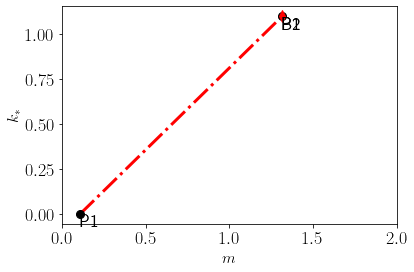

In [38]:
PC[namefold1].display(('m', 'A'), stability=True, linewidth=3)
# PC.plot.toggleLabels('off')
# PC.plot.fig1.toggleAll('off', bytype=['P', 'BT', 'CP'])
PC.plot.fig1.axes1.axes.set_xlim((0.0, 2.0))
PC.plot.fig1.axes1.axes.set_xlabel('$m$', fontsize=16)
# PC.plot.fig1.axes1.axes.set_ylim((0.0, 0.15))
PC.plot.fig1.axes1.axes.set_ylabel('$k_{*}$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
# plt.savefig(dir + 'ApplicationCellCyleTwoParBifurcation.pdf', bbox_inches='tight')
plt.show()

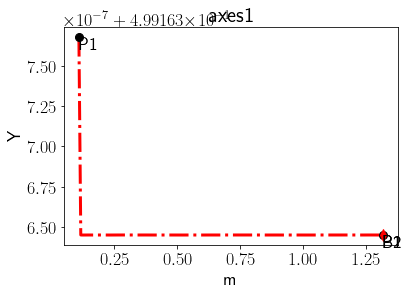

In [40]:
PC[namefold1].display(('m', 'Y'), stability=True, linewidth=3)

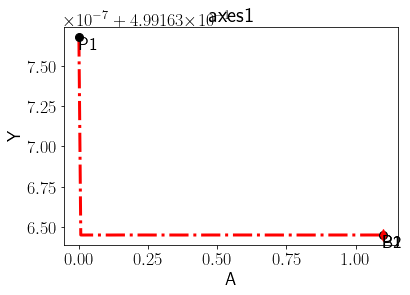

In [39]:
PC[namefold1].display(('A', 'Y'), stability=True, linewidth=3)

In [58]:
PC[namefold1].sol['A']

array([0.        , 0.00673631, 0.01481989, 0.02452018, 0.03616053,
       0.05012894, 0.06689104, 0.08700556, 0.11114299, 0.1401079 ,
       0.17378946, 0.20747102, 0.24115259, 0.27483415, 0.30851571,
       0.34219727, 0.37587883, 0.40956039, 0.44324195, 0.47692352,
       0.51060508, 0.54428664, 0.5779682 , 0.61164976, 0.64533132,
       0.67901289, 0.71269445, 0.74637601, 0.78005757, 0.81373913,
       0.84742069, 0.88110225, 0.91478382, 0.94846538, 0.98214694,
       1.0158285 , 1.04951006, 1.08319162, 1.10000003])

In [59]:
vars(PC[namefold1])

{'curvetype': 'LP-C',
 '_ptlabel': 'LP',
 'model': Non-Hybrid Model CellCycle,
 'gensys': Generator CellCycle,
 '_autoMod': None,
 'UseAuto': False,
 'description': 'None',
 'parsdict': {'A': 1.0999990296193645,
  'k1': 0.04,
  'k2p': 0.04,
  'k2pp': 1.0,
  'k3p': 1.0,
  'k3pp': 10.0,
  'k4': 35.0,
  'J3': 0.04,
  'J4': 0.04,
  'm': 1.3165677906776032},
 'freepars': ['m', 'A'],
 'auxpars': [],
 'varslist': ['P', 'Y'],
 'varsindices': array([0, 1]),
 'parsindices': array([9, 0]),
 'varsdim': 2,
 'freeparsdim': 2,
 'auxparsdim': 0,
 'dim': 4,
 'sysfunc': <PyDSTool.PyCont.TestFunc.Function at 0x7f4e86d10fd0>,
 'coords': [0, 1],
 'params': [2, 3],
 'allvars': [0, 1, 2, 3],
 'initpoint': array([0.04013402, 0.49916377, 0.10971398, 0.        ]),
 'initdirec': None,
 'initcycle': None,
 'SPOut': None,
 'NumSPOut': 300,
 'preTF': None,
 'MaxNumPoints': 2000,
 'MaxCorrIters': 5,
 'MaxTestIters': 10,
 'MaxStepSize': 0.05,
 'MinStepSize': 0.0001,
 'StepSize': 0.05,
 'VarTol': 1e-06,
 'FuncTol': 1e

What is the solution to 
$$
    \frac{dA}{dt} = 0 = k_{5p} + k_{5pp}\frac{(mY/J_{5})^{n}}{1+(mY/J_{5})^{n}} - k_{6}A,
$$
in the $mAY$-space? 

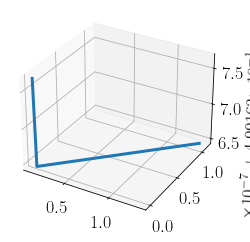

In [60]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Prepare arrays x, y, z
x = PC[namefold1].sol['m']
y = PC[namefold1].sol['A']
z = PC[namefold1].sol['Y']

ax.plot(x, y, z)

plt.show()

In [62]:
Y=0.22674444381187284
A = 0.5420835741849908
k5p = 0.005
k5pp = 0.2
k6 = 0.1
J5 = 0.3
m = 1.0
n = 4
k5p + k5pp*(m*Y/J5)**n/(1 + (m*Y/J5)**n) - k6*A

-1.3877787807814457e-17

In [76]:
import time
clock()

NameError: name 'clock' is not defined